# 1 Ряды
Пусть $x = ROUND(\sqrt{2n})$, где $ROUND$ - округление до ближайшего целого. Пусть $a_n=x^{−2}(x+1)^{−1}$.

Найдите сумму ряда $\sum\limits_{n = 3}^{\infty}a_n$.

Формат ответа - несократимая дробь $p∕q$. 

Решение:

In [1]:
for n in range(3, 30):
  x = round((2 * n) ** 0.5)
  print(x, end = ' ')

2 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6 6 7 7 7 7 7 7 7 8 

$\forall n \geq 3$ в сумме будет присутсовавать $n$ слагаемых с $x = n$. Тогда $\sum\limits_{n = 3}^{\infty} a_n = \frac{1}{12} + \sum\limits_{n=3}^{\infty} \frac{n}{n^2(n+1)} = \frac{1}{12} + \sum\limits_{n=3}^{\infty} \frac{1}{n(n+1)} $
Эта сумма раскладывается в телескопическую, она равна 1/3

Тогда ответ: $\frac{1}{12} + \frac{1}{3} = \frac{5}{12}$

In [2]:
sum = 0
for n in range(3, 1000000):
  x = round((2 * n) ** 0.5)
  sum += x ** (-2) * (x + 1) ** (-1)
print(sum)
print(5/12)

0.41595980938000715
0.4166666666666667


# 2 Теория вероятностей

Случайные величины $X$ и $Y$ независимы и равномерно распределены на отрезке $[0,1]$. Найдите математическое ожидание определителя матрицы:

$$ \left( \begin{matrix}
X & Y^2 \\
X^2 & XY
\end{matrix} \right) $$

Формат ответа - несократимая дробь $p∕q$. 

Решение: 

$$ M(X) = M(Y) = \frac{1}{2}, \quad M(X^2) = M(Y^2) = \frac{1}{3} $$

$$ \left| \begin{matrix}
X & Y^2 \\
X^2 & XY
\end{matrix} \right| = X^2Y - X^2Y^2 = X^2(Y-Y^2)$$

$$ M(X^2(Y-Y^2)) = M(X^2) \cdot M(Y - Y^2) = M(X^2) \cdot (M(Y) - M(Y^2)) = \frac{1}{3} \cdot \left( \frac{1}{2} - \frac{1}{3} \right) = \frac{1}{18}$$


# 3 Комбинаторика и графы

В графе $G, n=10$ вершин. Между каждой из $n(n−1)∕2$ различных пар вершин проведено ребро независимо от других с вероятностью $1∕2$.

Найдите математическое ожидание количества различных простых путей из вершины $u$ в вершину $v$, где $u,v∈G;u≠v$

Формат ответа - несократимая дробь $p∕q$. 


Решение: для пути длины $k$ необходимо между вершинами $u$ и $v$ разместить $k-1$ вершину. Всего способов сделать это $A_{n-2}^{k-1}$. Тогда в общем виде матожидание будет равно $\sum\limits_{k = 1}^{n - 1} A_{n - 2}^{k - 1} k p ^k$, а для условия задачи $\sum\limits_{k = 1}^{9} \frac{k A_{8}^{k - 1}}{2^k} = \frac{16293}{4}$

In [3]:
from math import factorial

def A(n, k):
  return factorial(n) / factorial(n - k)

M = 0
for k in range(1, 10):
  M += k * A(8, k - 1) / (2 ** k)
print(M)
print(16293/4)

4073.25
4073.25


# 4 Матрицы

Известно, что след матрицы $A$ равен 5. Найдите минимальное возможное целое положительное значение следа результата произведения матриц

$$
\left( \begin{matrix}
1 & 2 & 5 \\
3 & 1 & 3 \\
-4 & 2 & 1
\end{matrix} \right) A \left( \begin{matrix}
-5 & 8 & 1 \\
-15 & 21 & 12 \\
10 & -10 & -5
\end{matrix} \right)
$$

Формат ответа - целое число. 

Решение: 


In [4]:
import numpy as np

L = np.array([[1, 2, 5],
              [3, 1, 3],
              [-4, 2, 1]])

R = np.array([[-5, 8, 1],
              [-15, 21, 12],
              [10, -10, -5]])

print(np.linalg.inv(L))

[[-0.33333333  0.53333333  0.06666667]
 [-1.          1.4         0.8       ]
 [ 0.66666667 -0.66666667 -0.33333333]]


In [5]:
print(15 * np.linalg.inv(L))

[[ -5.   8.   1.]
 [-15.  21.  12.]
 [ 10. -10.  -5.]]


$15 L^{-1} = R$

$tr(LAR) = tr(LA\cdot 15L^{-1}) = 15 tr(LAL^{-1}) = 15 tr(A) = 15 \cdot 5 = 75$

# 5 Форма выхода нейросети

При разработке архитектуры глубокой нейронной сети важно понимать, какие размеры карт признаков формирует тот или иной ее слой. Так Вы можете оценить быстродействие и потребность в памяти фрагментов модели.

В ходе выполнения задачи необходимо определить размер выходной карты признаков фрагмента глубокой нейронной сети, показанной на рисунке.

Дано, что размер входной карты признаков составляет B = 16 (размер батча), С = 3 (количество каналов), N = 100 (высота карты признаков), M = 200 (ширина карты признаков).

На схеме Conv2D — сверточные слои, MaxPool2D — слой подвыборки (пулинга), BatchNorm — слой батч-нормализации, ReLU — слой с соответствующей активационной функцией. На схеме также показаны значимые параметры соответствующих слоев. Смысл параметров такой же, как принято в библиотеке pytorch.

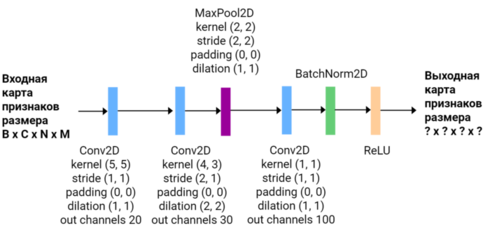

В качестве ответа введите 4 числа, разделенных пробелом, соответствующих размеру батча, количеству каналов, высоте и ширине выходной карты признаков. 

Решение:

In [6]:
from torch import nn
import torch

l1 = nn.Conv2d(in_channels = 3,
               out_channels = 20,
               kernel_size = (5, 5),
               stride = (1, 1),
               padding = (0, 0),
               dilation = (1, 1))

l2 = nn.Conv2d(in_channels = 20,
               out_channels = 30,
               kernel_size = (4, 3),
               stride = (2, 1),
               padding = (0, 0),
               dilation = (2, 2))

l3 = nn.MaxPool2d(kernel_size = (2, 2),
                  stride = (2, 2),
                  padding = (0, 0),
                  dilation = (1, 1))

l4 = nn.Conv2d(in_channels = 30,
               out_channels = 100,
               kernel_size = (1, 1),
               stride = (1, 1),
               padding = (0, 0),
               dilation = (1, 1))

l5 = nn.BatchNorm2d(100)

l6 = nn.ReLU()

input = torch.randn(16, 3, 100, 200)
output = l6(l5(l4(l3(l2(l1(input))))))
print(output.shape)

torch.Size([16, 100, 22, 96])


# 6 Предсказания с шумом и якобиан

Завод по производству химических удобрений оборудован набором датчиков, показания которых задаются вектором $x∈ \mathbb{R}^N$. Для предсказания набора показателей $y∈ \mathbb{R}^M$, характеризующих качество и эффективность производства, была обучена нейронная сеть $f:\mathbb{R}^N→\mathbb{R}^M$. В паспорте каждого датчика указана его погрешность измерений, кроме того, показания некоторых датчиков связаны ("скоррелированы") между собой. Предполагается, что шум датчиков имеет нормальное распределение. На основе этих знаний была составлена матрица ковариации $Σ=covx$ вектора показаний $x$. Известно, что максимальное собственное значение этой матрицы много меньше единицы.

Оцените погрешность предсказаний модели. Для этого вычислите матрицу ковариации $f(x)$, если известно значение Якобиана $\frac{df}{dx}$ в точке $x_0$ — текущих показаниях датчиков, и матрица ковариации $Σ$. В качестве ответа укажите след матрицы ковариации с точностью до трех знаков после запятой. 

$$ \Sigma = \left( \begin{matrix}
0.3 & -0.2 & 0 & 0.02 \\
-0.2 & 0.9 & 0 & 0.1 \\
0 & 0 & 0.5 & -0.01 \\
0.02 & 0.1 & -0.01 & 1.1
\end{matrix} \right) $$

$$ \frac{df}{dx} = \left( \begin{matrix}
0.3 & -0.1 & 1.1 & -2.6 \\
2.4 & 0.4 & -0.7 & 1.5 \\
0.7 & -0.9 & 0.3 & 2.1 \\
-0.2 & 0.4 & 0.5 & 0.5 \\
1.8 & 1.6 & 0.9 & -1.3
\end{matrix} \right) $$


Решение: 


In [7]:
import numpy as np

cov = np.array([[0.3, -0.2, 0, 0.02],
                [-0.2, 0.9, 0, 0.1],
                [0, 0, 0.5, -0.01],
                [0.02, 0.1, -0.01, 1.1]])

J = np.array([[0.3, -0.1, 1.1, -2.6],
              [2.4, 0.4, -0.7, 1.5],
              [0.7, -0.9, 0.3, 2.1],
              [-0.2, 0.4, 0.5, 0.5],
              [1.8, 1.6, 0.9, -1.3]])

print(J @ cov @ J.T)
print('Answer: ', np.trace(J @ cov @ J.T))

[[ 8.167  -4.7405 -5.4551 -1.3251  3.7043]
 [-4.7405  4.493   3.997   0.568  -1.343 ]
 [-5.4551  3.997   5.6922  0.7976 -3.1906]
 [-1.3251  0.568   0.7976  0.619  -0.0488]
 [ 3.7043 -1.343  -3.1906 -0.0488  3.9018]]
Answer:  22.873000000000005


# 7 Решающее дерево

Вася решает задачу бинарной классификации объектов с признаками $(x_1,x_2)$. Обучающая выборка состоит из $2021^2$ объектов с признаками $(m,n)$, где $m, n$ пробегают все возможные значения от $1$ до $2021$. При этом объекты с нечётной суммой $x_1+x_2$ относятся к первому классу, а с чётной — ко второму классу. Вася хочет построить решающее дерево, идеально решающее его задачу на обучающей выборке (то есть такое решающее дерево, которое ни разу не ошибается на обучающей выборке). Решающие правила в узлах дерева имеют вид $[x_i<a], i=1,2$. Какой минимальной глубиной дерева может обойтись Вася? 

Решение. Понадобится 2020 разделения по оси x и 2020 разделений по оси y. Ответ: 4040

Если решать в общем виде, то для набора $(2n+1)^2$ точек понадобится $4n$ деревьев. Проверка на мелких числах:

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

for N in range(3, 61, 2):

  x1 = np.arange(1, N + 1)
  x2 = np.arange(1, N + 1)
  dataset = np.transpose([np.tile(x1, len(x2)), np.repeat(x2, len(x1))])
  target = np.array([0, 1] * (N ** 2 // 2) + [0])

  df = pd.DataFrame()
  df['x1'] = dataset[:, 0]
  df['x2'] = dataset[:, 1]
  df['target'] = target

  target = np.array(df['target'])
  i = 1
  while True:
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(df[['x1', 'x2']], df['target'])
    if not (target - DT.predict(df[['x1', 'x2']])).any():
      break
    i += 1
  print(f"N: {N}, depth: {i}")

N: 3, depth: 4
N: 5, depth: 8
N: 7, depth: 12
N: 9, depth: 16
N: 11, depth: 20
N: 13, depth: 24
N: 15, depth: 28
N: 17, depth: 32
N: 19, depth: 36
N: 21, depth: 40
N: 23, depth: 44
N: 25, depth: 48
N: 27, depth: 52
N: 29, depth: 56
N: 31, depth: 60
N: 33, depth: 64
N: 35, depth: 68
N: 37, depth: 72
N: 39, depth: 76
N: 41, depth: 80
N: 43, depth: 84
N: 45, depth: 88
N: 47, depth: 92
N: 49, depth: 96
N: 51, depth: 100
N: 53, depth: 104
N: 55, depth: 108
N: 57, depth: 112
N: 59, depth: 116
